In [2]:
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
import cmocean.cm as cmo

In [3]:
df = pd.read_csv('./SRHASalinityDilution2023.csv', sep=',')
df

,Category,percent_HA,Salinity,ID
0,100HA,100,36,100HA_1
1,100HA,100,36,100HA_2
2,100HA,100,35,100HA_3
3,100HA,100,36,100HA_4
4,100HA,100,36,100HA_5
5,100HA,100,36,100HA_6
6,100HA,100,36,100HA_7
7,100HA,100,37,100HA_8
8,100HA,100,36,100HA_9
9,100HA,100,36,100HA_10


Text(0.5, 1.0, 'PW Salinity Histogram')

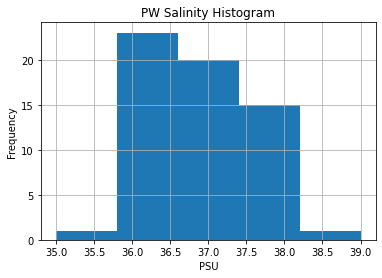

In [4]:
df['Salinity'].hist(bins = 5)
plt.xlabel('PSU')
plt.ylabel('Frequency')
plt.title('PW Salinity Histogram')

C:\Users\12532\AppData\Local\Temp\ipykernel_22984\435470537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


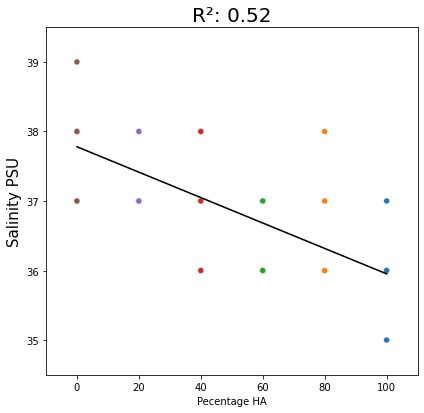

In [5]:
# Create a new plot for each group
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

data = df[['percent_HA', 'Salinity', 'Category']]
data.dropna(inplace=True)
X = data[['percent_HA']]
y = data['Salinity']

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)
score = model.score(X, y)

# Plot the data and regression line
ax = axes
sns.scatterplot(x='percent_HA', y='Salinity', hue='Category', data=data, ax=ax, legend=False)
sns.lineplot(x=X['percent_HA'], y=model.predict(X), ax=ax, color='black')

# Set the axis labels and title
ax.set_ylabel('Salinity PSU', size=15)
ax.set_xlabel('Pecentage HA')
ax.set_title(f'R\u00B2: {score:.2f}', size=20, color='black')
ax.set_ylim(34.5, 39.5) 
ax.set_xlim(-10, 110)

# Adjust the layout of the subplots
fig.suptitle(f'', size=20)
fig.set_facecolor('w')
plt.tight_layout()

# plt.savefig(f"../../../Data_Thesis/FIGS/Cor_plots/PW_cor_breakdown/FE_DOC_{station}.png")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [11]:
categories = df['Category'].unique()
data_summary = pd.DataFrame(columns=['Category', 'Mean', 'Std', 'Lower CI', 'Upper CI'])

for category in categories:
    subset = df[df['Category'] == category]['Salinity']
    mean = subset.mean()
    std = subset.std()
    ci = stats.t.interval(0.95, len(subset) - 1, loc=mean, scale=std / len(subset) ** 0.5)
    subset2 = df[df['Category'] == category]['percent_HA']
    mean_HA = subset2.mean()
    data_summary = data_summary.append({'Category': category,'HA': mean_HA, 'Mean': mean, 'Std': std,
                                        'Lower CI': ci[0], 'Upper CI': ci[1]}, ignore_index=True)
data_summary

C:\Users\12532\AppData\Local\Temp\ipykernel_22984\1340477770.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_summary = data_summary.append({'Category': category,'HA': mean_HA, 'Mean': mean, 'Std': std,
C:\Users\12532\AppData\Local\Temp\ipykernel_22984\1340477770.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_summary = data_summary.append({'Category': category,'HA': mean_HA, 'Mean': mean, 'Std': std,
C:\Users\12532\AppData\Local\Temp\ipykernel_22984\1340477770.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_summary = data_summary.append({'Category': category,'HA': mean_HA, 'Mean': mean, 'Std': std,
C:\Users\12532\AppData\Local\Temp\ipykernel_22984\1340477770.py:11: FutureWarning: The frame.appe

,Category,Mean,Std,Lower CI,Upper CI,HA
0,100HA,36.0,0.471405,35.662778,36.337222,100.0
1,80HA,36.5,0.707107,35.994166,37.005834,80.0
2,60HA,36.3,0.483046,35.95445,36.64555,60.0
3,40HA,37.1,0.737865,36.572163,37.627837,40.0
4,20HA,37.5,0.527046,37.122974,37.877026,20.0
5,0HA,37.8,0.632456,37.347569,38.252431,0.0


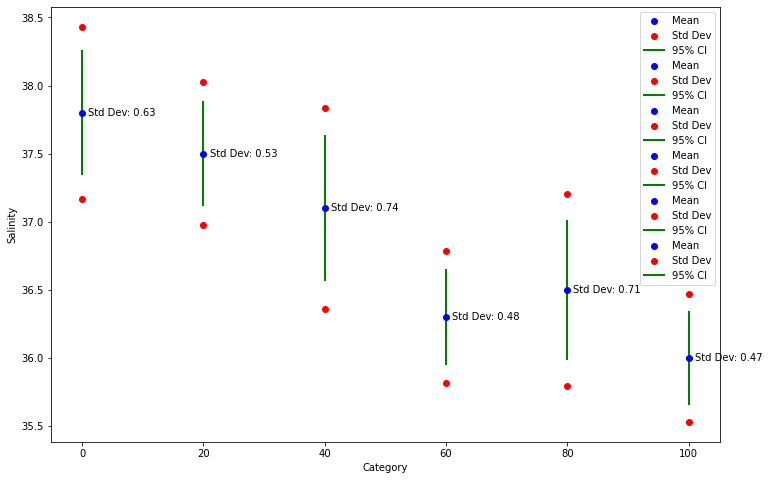

In [16]:
plt.figure(figsize=(12, 8))

for _, row in data_summary.iterrows():
    category = row['HA']
    mean = row['Mean']
    std = row['Std']
    lower_ci = row['Lower CI']
    upper_ci = row['Upper CI']

    # Plot the mean with a blue dot and the standard deviation with red dots
    plt.scatter(category, mean, c='blue', label='Mean', zorder=2)
    plt.scatter([category] * 2, [mean + std, mean - std], c='red', label='Std Dev', zorder=2)

    # Plot the 95% confidence interval
    plt.plot([category, category], [lower_ci, upper_ci], c='green', lw=2, label='95% CI', zorder=1)

    # Plot the trend line
    plt.plot([category - 0.2, category + 0.2], [mean + std, mean + std], 'r--', lw=1, zorder=1)
    plt.plot([category - 0.2, category + 0.2], [mean - std, mean - std], 'r--', lw=1, zorder=1)
    plt.plot([category - 0.2, category + 0.2], [mean, mean], 'b-', lw=2, zorder=1)

    # Print the standard deviation value next to the blue mean dot
    plt.text(category + 1, mean, f'Std Dev: {std:.2f}', verticalalignment='center')

# Add labels and legend
plt.xlabel('Category')
plt.ylabel('Salinity')
plt.legend()

# Show the plot
plt.show()
